## Importamos librerías

In [1]:
from keras.datasets import imdb
from keras import models, layers, optimizers
import numpy as np


## Descargamos los datos de imdb - Keras

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Función de one-hot encoding

In [3]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults 

## Transformamos datos

In [4]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Red neuronal original

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

## Entrenando

In [9]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5162 - acc: 0.7854 - val_loss: 0.4287 - val_acc: 0.8189
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3127 - acc: 0.8993 - val_loss: 0.3095 - val_acc: 0.8873
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2283 - acc: 0.9273 - val_loss: 0.3046 - val_acc: 0.8781
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1820 - acc: 0.9423 - val_loss: 0.2839 - val_acc: 0.8869
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1500 - acc: 0.9525 - val_loss: 0.2792 - val_acc: 0.8891
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1235 - acc: 0.9625 - val_loss: 0.2917 - val_acc: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1013 - acc: 0.9707 - val_loss: 0.3041 - val_acc: 0.8844
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0821 - a

### Comparando un modelo más pequeño

In [10]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [12]:
history2 = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6635 - acc: 0.6167 - val_loss: 0.6371 - val_acc: 0.7118
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.6078 - acc: 0.7191 - val_loss: 0.5953 - val_acc: 0.7318
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.5632 - acc: 0.7757 - val_loss: 0.5618 - val_acc: 0.7503
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.5251 - acc: 0.8152 - val_loss: 0.5321 - val_acc: 0.8238
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4930 - acc: 0.8475 - val_loss: 0.5085 - val_acc: 0.8328
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4655 - acc: 0.8709 - val_loss: 0.4899 - val_acc: 0.8333
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4413 - acc: 0.8881 - val_loss: 0.4733 - val_acc: 0.8519
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4202 - a

## Analizamos resultados

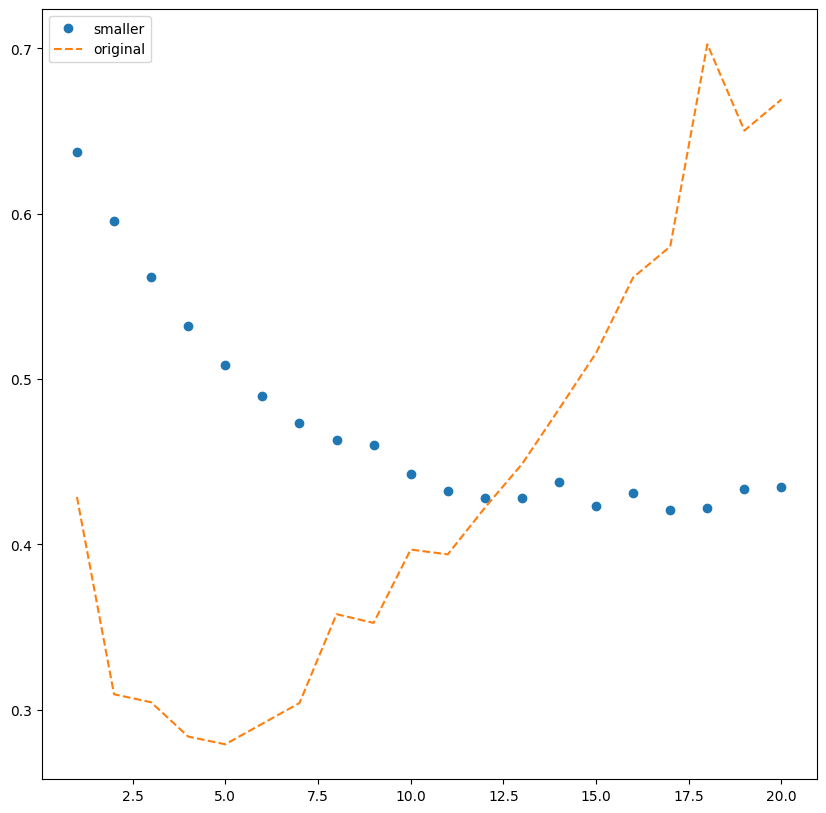

In [13]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values2 = history2.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values2, 'o',label='smaller')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

## Regularización

In [14]:
from keras import regularizers

In [15]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [17]:
history3 = model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5427 - acc: 0.7705 - val_loss: 0.4102 - val_acc: 0.8666
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3353 - acc: 0.9008 - val_loss: 0.3498 - val_acc: 0.8806
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2733 - acc: 0.9237 - val_loss: 0.3673 - val_acc: 0.8646
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2415 - acc: 0.9340 - val_loss: 0.3495 - val_acc: 0.8766
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2159 - acc: 0.9454 - val_loss: 0.3262 - val_acc: 0.8892
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2056 - acc: 0.9478 - val_loss: 0.3382 - val_acc: 0.8836
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1876 - acc: 0.9587 - val_loss: 0.3590 - val_acc: 0.8818
Epoch 8/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1813 - acc

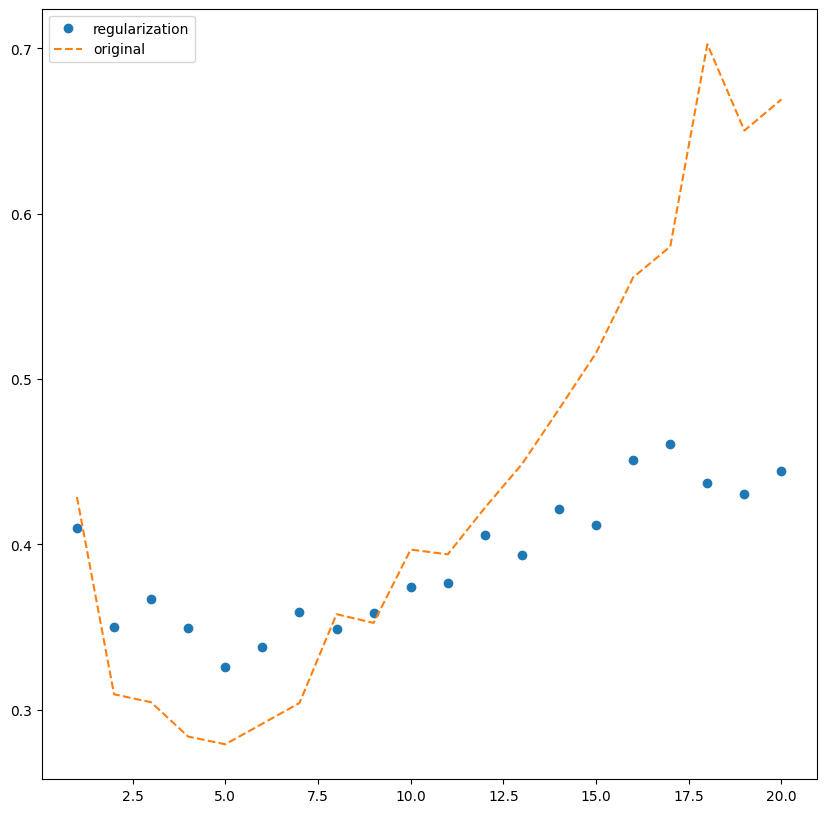

In [18]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values3 = history3.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values3, 'o',label='regularization')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

### Dropout

In [19]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [21]:
history4 = model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6362 - acc: 0.6350 - val_loss: 0.5394 - val_acc: 0.7690
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5066 - acc: 0.7712 - val_loss: 0.3977 - val_acc: 0.8709
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.4171 - acc: 0.8279 - val_loss: 0.3286 - val_acc: 0.8828
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3480 - acc: 0.8666 - val_loss: 0.2926 - val_acc: 0.8856
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3004 - acc: 0.8870 - val_loss: 0.2750 - val_acc: 0.8891
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2585 - acc: 0.9073 - val_loss: 0.2709 - val_acc: 0.8898
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2258 - acc: 0.9188 - val_loss: 0.2714 - val_acc: 0.8906
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2056 - a

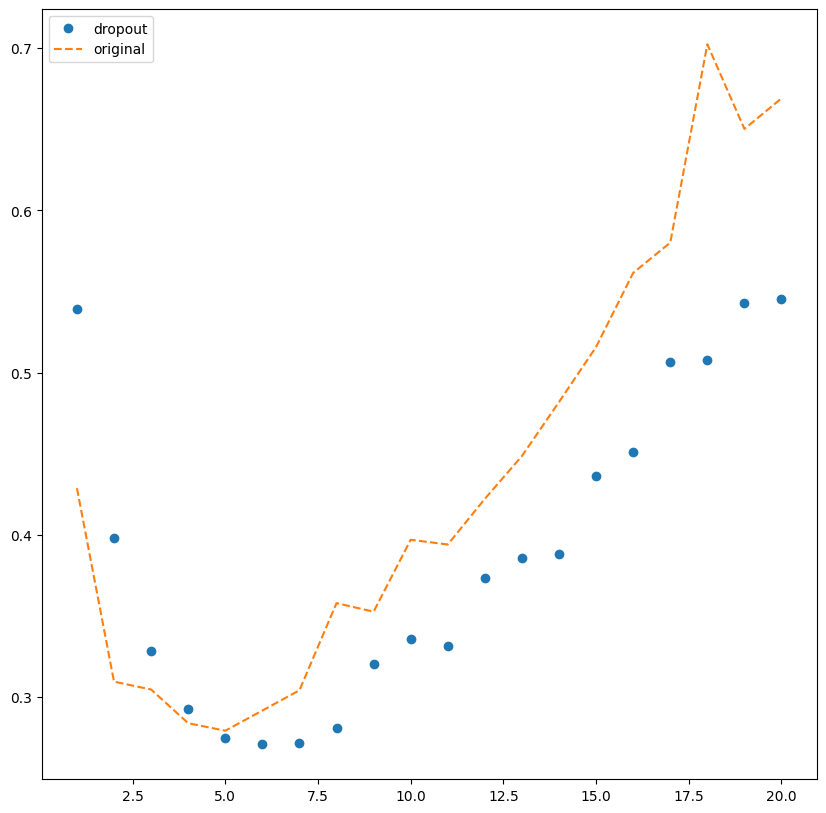

In [22]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values4 = history4.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values4, 'o',label='dropout')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()